In [1]:
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import datetime


*Business Requirements*

The essence of this project is to help management of "Watch-it media services " through the following :

1. Understand the key components that drives revenue in movies.
2. Analyze and identify features in movies that will attract viewers in movies.
3. Recommend/ classify  movies that will help management generate more revenue so that they can be license.

This is clearly a supervised machine learning task as its requires us  to train a model using the label that has been provided.In addition , The supervised machine learning task is a categorical type since the label (Revenue category) is categorical or discrete as a data type.


In the course of this project , The Machine learning tasks will follow below stages .


1. Business Requirements 
2. Data cleaining - (checking for missing values and errors and treating this issues)
3. Data Exploration
4. Data Splitting
5. Data preprocessing / Preparation (Feature engineering)
6. Model Training 
7. Model Evaluation

#### loading the dataset

In [243]:
df = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [244]:
df_clone = df.copy()

In [245]:
pd.set_option('display.max_columns', 500)

In [246]:
df.sample(5)

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,users_votes,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
212,Europa Report,USA,"Drama, Mystery, Sci-Fi, Thriller","English, Russian, Chinese",1.0,False,PG-13,27-Jun-13,90 min,08-Oct-13,"62,980",1489.0,4960.0,2911267.0,357.0,6.4/10,81%,68/100,0,1,2,Low
363,Art and Craft,USA,Documentary,English,NaN,False,Not Rated,18-Mar-15,89 min,26-Jan-15,"1,304",5.0,161.0,40918.0,3.0,7.1/10,91%,68/100,0,2,2,Low
508,"Twilight Saga: Breaking Dawn - Part 1, The",USA,"Adventure, Drama, Fantasy, Romance","English, Portuguese",2.0,True,PG-13,18-Nov-11,117 min,11-Feb-12,"2,08,693",3799.0,24012.0,9310482.0,1391.0,4.9/10,25%,45/100,0,11,22,High
445,Quantum of Solace,"UK, USA","Action, Adventure, Thriller","English, Spanish, Italian, French, Swiss Germa...",3.0,False,PG-13,14-Nov-08,106 min,24-Mar-09,"3,78,057",141.0,2117.0,681785.0,114.0,6.6/10,65%,58/100,1,4,30,High
173,Silent Night,"Canada, USA","Comedy, Horror, Mystery, Thriller",English,1.0,True,R,04-Dec-12,94 min,04-Dec-12,"6,913",821.0,3604.0,1241159.0,472.0,5.2/10,64%,53/100,0,0,0,Low


### checking for shape and structure of the dataset

In [247]:
df.shape

(2400, 22)

the dataset contains 2400 columns and 22 rows

### checking for missing values, errors and untidyness of the dataset

In [248]:
df.isna().sum()

title                   2
country                 0
genres                  0
language                0
writer_count           94
title_adaption          0
censor_rating          38
release_date            4
runtime                 0
dvd_release_date       69
users_votes             0
comments              426
likes                 444
overall_views         317
dislikes              444
ratings_imdb            0
ratings_tomatoes        0
ratings_metacritic      0
special_award           0
awards_win              0
awards_nomination       0
revenue_category        0
dtype: int64

The dataset contains some missing values, this will be treated as part of our cleaning process later on

#### checking if the dataset is imbalance 

In [249]:
label_count = df["revenue_category"].value_counts()
for row in label_count.index:
    print(f"The no of observations for category {row} is :","{:.1f}%".format(label_count[row]/df.shape[0]*100))

The no of observations for category High is : 50.9%
The no of observations for category Low is : 49.1%


The dataset is not really imbalance as the difference between the two category of classes is not significant

### Identifying columns required for cleaning

Based on the exploration done , The following are the issues with the dataset and needs to be treated.

1. There are missing values in the dataset
2. There are multiple values in columns such as country, genres, language which needs to be treated before exploration 
3. There are inconsistencies with  ratings_imdb column and ratings_metacritic as it contains ('/') 
4. The column ratings_tomatoes is represent in percentage , we need to convert it to numerical values.
5. Remove "," from users_votes column
6. Convert field such as release_date to datetime object and remove 'min' from runtime column

## cleaning the data 

In [251]:

# Issue 1
#for missing values, we are going to treat missing values at the point of Data preprocessing . This will help automatate cleaning process even for new datasets 

In [252]:
# issue 2
#  since there are multiple values for each rows, This issues can be treated in the following ways :

# 1. Have them appear as a list data type on all rows but that wont solve our problem as we need to explore them.
# 2. Select the first values that appears in all rows across required colums

# In this course of this project , lets pick option 2 which is to select every first value in each row 

multiple_values_columns = ["country", "genres", "language"]

for columns in multiple_values_columns:
    
    df[columns] = df[columns].apply(lambda x : x.split(',')[0])

In [253]:
# issue 3 n 4

df["ratings_imdb"] = df["ratings_imdb"].apply(lambda x :float(x.split("/")[0])/10)
df["ratings_metacritic"] = df["ratings_metacritic"].apply(lambda x :float(x.split("/")[0])/100)
df["ratings_tomatoes"] = df["ratings_tomatoes"].apply(lambda x :float(x.replace("%",""))/100)


In [254]:
### Issue 5

df["users_votes"] = df["users_votes"] .apply(lambda x :int(x.replace(",","")))

In [255]:
### Issue 6
df["release_date"] =pd.to_datetime(df['release_date']).dt.year

df["runtime"] = df["runtime"].apply(lambda x : int(x.replace("min"," ")))

In [256]:
#This is how the cleaned data looks like after cleaning

df.sample(5)

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,users_votes,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
2178,Me Without You,UK,Drama,English,2.0,True,R,2001.0,107,17-Jun-03,4155,33.0,293.0,211784.0,12.0,0.70,0.66,0.67,0,0,2,Low
2371,Girlhood,France,Drama,French,1.0,True,Unrated,2014.0,113,19-May-15,6444,98.0,965.0,197481.0,43.0,0.69,0.96,0.85,0,11,21,Low
301,Freddy Got Fingered,USA,Comedy,English,2.0,False,R,2001.0,87,23-Oct-01,43804,13.0,97.0,69100.0,18.0,0.45,0.10,0.13,0,12,6,High
864,Doom,UK,Action,English,3.0,True,R,2005.0,105,07-Feb-06,99781,611.0,3383.0,1249367.0,328.0,0.52,0.19,0.34,0,0,3,High
2125,Nas: Time Is Illmatic,USA,Documentary,English,1.0,False,PG-13,2014.0,74,03-Feb-15,2535,166.0,1864.0,253296.0,13.0,0.71,1.00,0.72,0,0,1,Low


Now, that we have the data cleaned , we can go ahead into exploring the data

### Data Exploratory

In this course of this project, we shall explore the dataset based on the following explorations 

* Univarate Analysis

* Bivarate Analysis 

* Multivarate Analysis 

### Univarate Analysis


1. Genres with the most number of movies produced

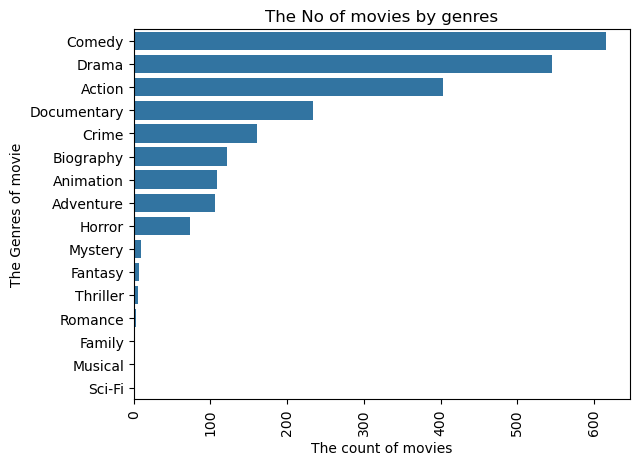

In [257]:
sorted_order = df["genres"].value_counts().sort_values(ascending = False).index
color = sb.color_palette()[0]
sb.countplot(y = df["genres"], order= sorted_order , color= color)
plt.title("The No of movies by genres")
plt.ylabel("The Genres of movie")
plt.xlabel("The count of movies")
plt.xticks(rotation = 90)
plt.show();


We can see here that genres such as comedy,Drama, Action are the most produced genres. This is because alot of producers would prefer producing this genres with the mindset that this genres attract viewers.

2. The average runtime of movies

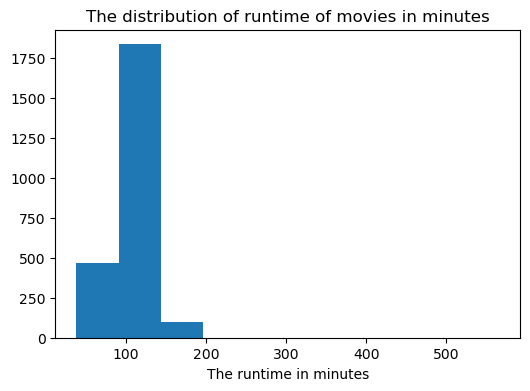

In [258]:
plt.figure(figsize= (6,4))
plt.hist( df["runtime"])
plt.title("The distribution of runtime of movies in minutes")
plt.xlabel("The runtime in minutes");


Despite that ,  there are  movies with shorter runtime like 38 mins, most movies duration are usually between 100 and 106 minutes 

*3. Which year has the most number of movies released?*

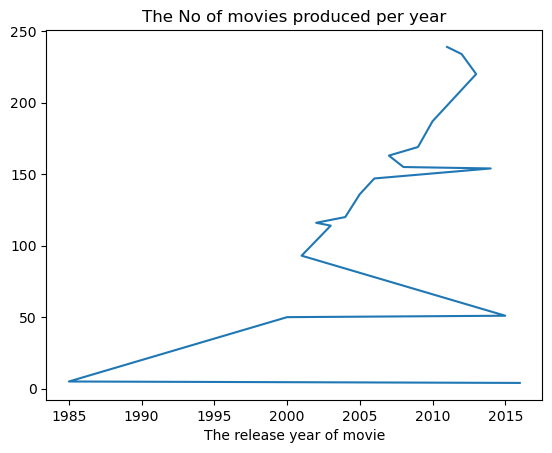

In [41]:
df["release_date"].value_counts().sort_values(ascending = False).head(18).plot(kind = 'line' )
plt.title("The No of movies produced per year")
plt.xlabel("The release year of movie")
plt.show();

Most movies were released between 2007 to 2013

*4. The most used languages in which movie was released ?*



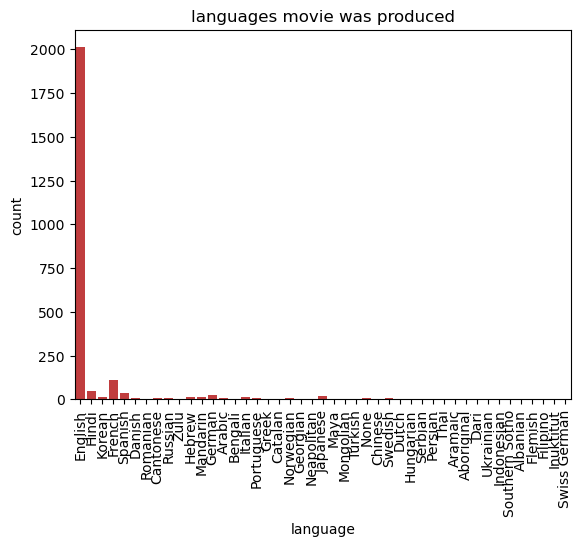

In [259]:
color_1 = sb.color_palette()[3]
sb.countplot(x = df['language'],color= color_1)
plt.title("The languages movie was releaseed")
plt.xticks(rotation = 90);

Most movies were released in English 

*5. How many movies were screenplay or adapted*

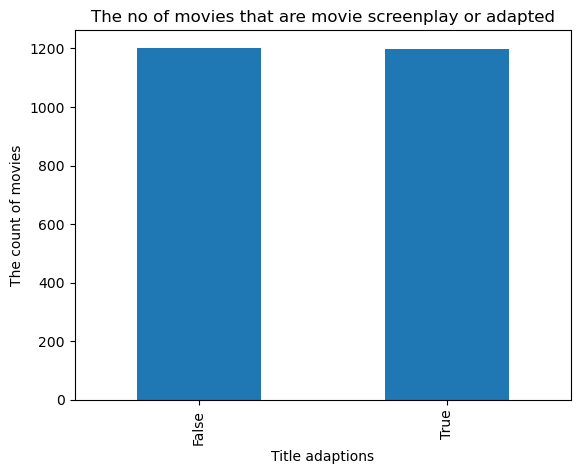

In [261]:
df["title_adaption"].value_counts().plot(kind = 'bar')
plt.title("The no of movies that are movie screenplay or adapted")
plt.xlabel("Title adaptions")
plt.ylabel("The count of movies");


There are slightly more number of movies that are original scrrenplay than titled adapted movies

*6 Average rating  given to movie by IMDB*

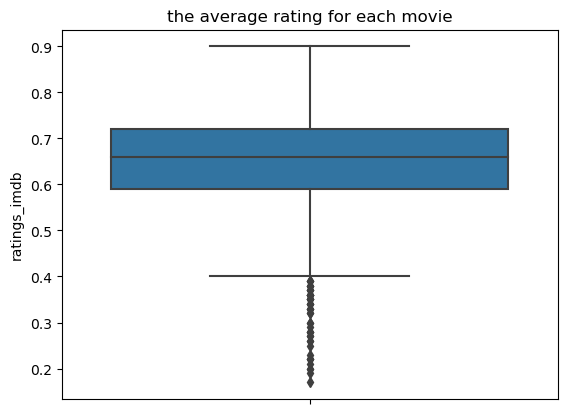

In [46]:
sb.boxplot(y = df["ratings_imdb"]);
plt.title("the average rating for each movie");


The average rating movie giving by IMDB is .67,if we look more closely we will see some values below .4 which are outliers and can be investigated further . It could be that the values were erroneously computed .

*7. The Censor rating for movie*

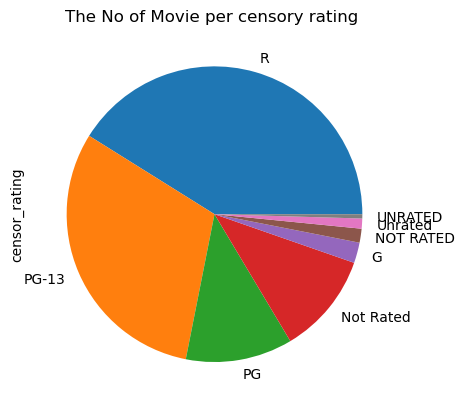

In [262]:
df["censor_rating"].value_counts().plot(kind = "pie")
plt.title("The No of Movie per censory rating ");

Most movie were censored in category R

8 . Movies revenue category 

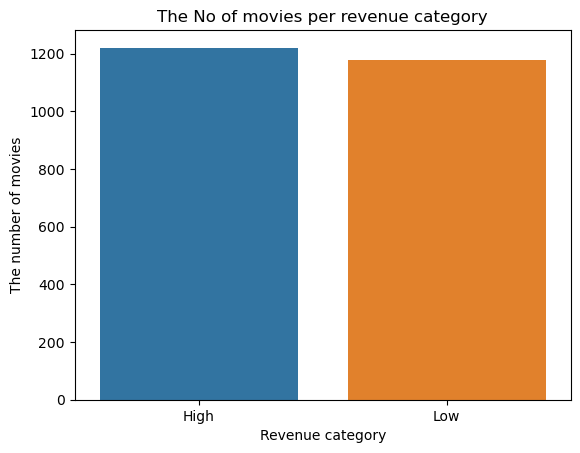

In [263]:
sb.countplot(x = df["revenue_category"])
plt.title("The No of movies per revenue category")
plt.xlabel("Revenue category")
plt.ylabel("The number of movies");

The movies that generated high revenues are slightly higher than ones with low revenue.

## Bivarate Analysis

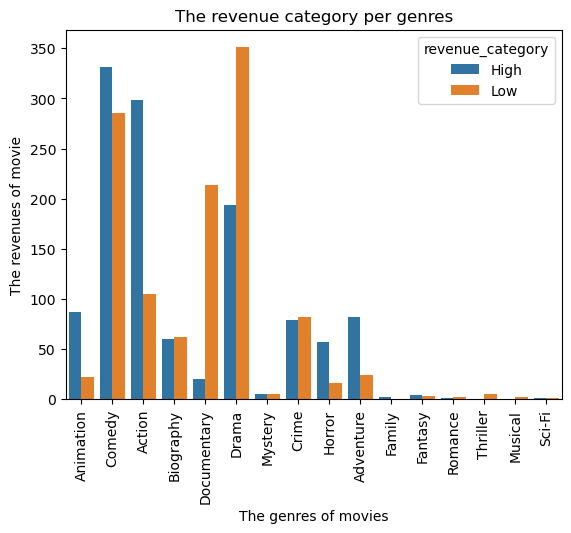

In [264]:
sb.countplot(hue= df["revenue_category"] , x= df["genres"])
plt.title("The revenue category per genres")
plt.xlabel("The genres of movies")
plt.ylabel("The revenues of movie")
plt.xticks(rotation = 90);

Building on existing  Knowledge.It can be observed that the movie genres with the highest production rates generally yield the highest revenues, with the exception of  Drama genre. In the case of Drama, the revenues for most movies produced are comparatively lower than those with higher revenue.This observation reinforces the position of producers and film makers to focus on producing movies that have the potential to generate higher revenues.

*2. How does movie award affecting  rating ?*

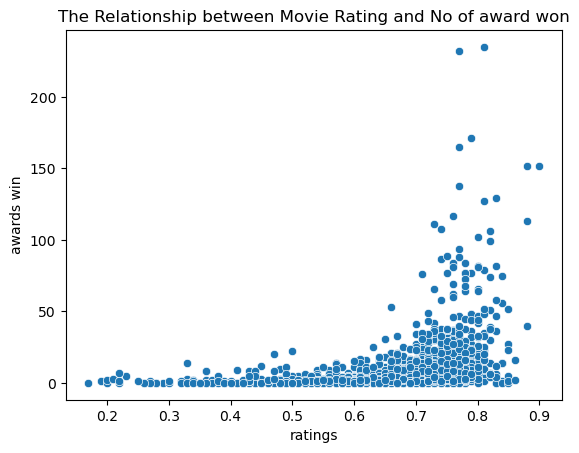

In [401]:
sb.scatterplot(x= df["ratings_imdb"] , y = df["awards_win"] )
plt.title("The Relationship between Movie Rating and No of award won")
plt.xlabel("ratings")
plt.ylabel("awards win");

A slight positive correlation exists between the number of awards a movie has received and its ratings. This suggests that a film with numerous accolades is likely to have a significant rating

*3. What impact does No of views have on the revenue generated for the film?*

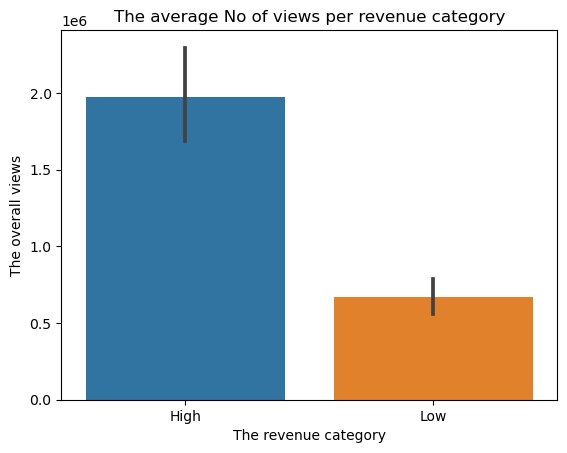

In [485]:
sb.barplot(x = df["revenue_category"] , y = df['overall_views'])
plt.title("The average No of views per revenue category")
plt.xlabel("The revenue category")
plt.ylabel("The overall views");

Usually, an increase in movie viewership leads to revenue generation. lets also look at what what other engagememts drives revenues

*4. Does increase in No of comments for movies influences revenue generation?* 

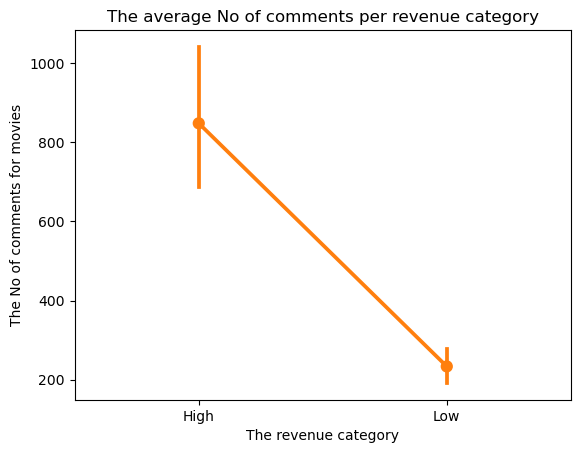

In [460]:
sb.pointplot(x = df["revenue_category"] , y = df['comments'],color= sb.color_palette()[1])
plt.title("The average No of comments per revenue category")
plt.xlabel("The revenue category")
plt.ylabel("The No of comments for movies");


Movies that achieve high revenue are those that receive the most comments on viewing platforms .Driving the engagements of viewers, subscribers on viewing platform is a strategic approach to gaining traction for movies, ultimately contributing to increased revenue generation.

*5.what impact Does No of awards  a movie won have on revenue generation?*

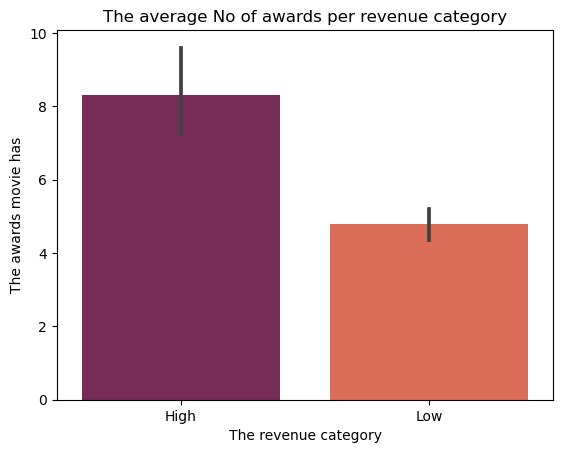

In [476]:
sb.barplot(x = df["revenue_category"] , y = df['awards_win'], palette='rocket')
plt.title("The average No of awards per revenue category")
plt.xlabel("The revenue category")
plt.ylabel("The awards movie has");

 Movies with high revenue tend to win a significantly greater number of awards compared to those with lower revenue. This implies that increase in number of awards won by a movie can improve market acceptabaility, increase positive reviews and  contribute to gaining a larger audience ultimately maximizing financial success. 

*6 How does censor rating of movies influenced revenue generated*

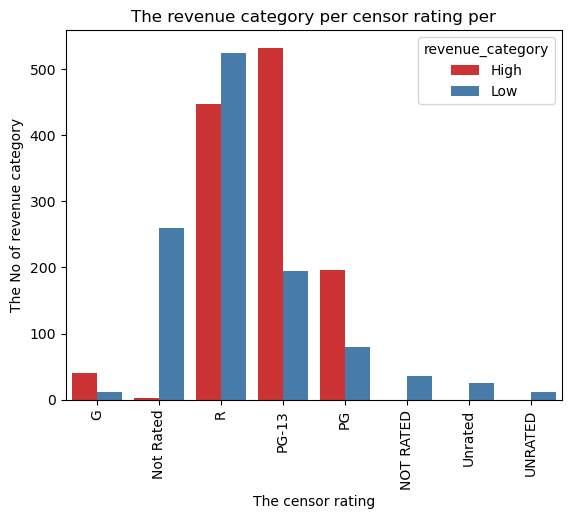

In [477]:
sb.countplot(x = df ["censor_rating"] , hue= df["revenue_category"], palette= 'Set1')
plt.title("The revenue category per censor rating per")
plt.xlabel("The censor rating")
plt.ylabel("The No of revenue category")
plt.xticks(rotation = 90);


Although a substantial number of R-rated movies were produced, it is the PG-13 movies that generate the highest revenue. This can be attributed to the fact that PG-13 movies attract a larger audience than any other censor-rated films.

*7.can title adoption influences the revenue for movies?*

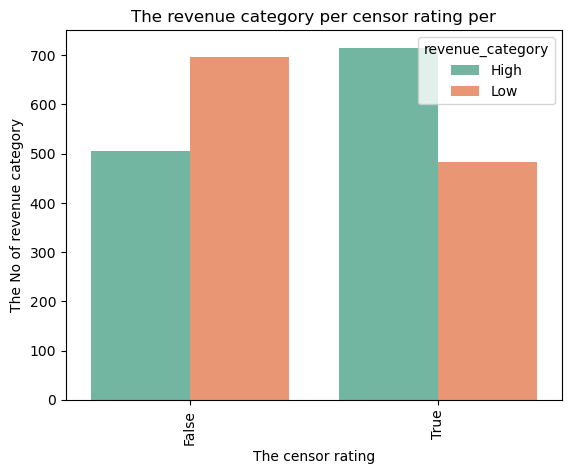

In [96]:
sb.countplot(x = df ["title_adaption"] , hue= df["revenue_category"], palette="Set2")
plt.title("The revenue category per censor rating per")
plt.xlabel("The censor rating")
plt.ylabel("The No of revenue category")
plt.xticks(rotation = 90);

It shows that movies that generate the most revenue are usually original screenplay.This is because Original screenplays have the advantage of presenting fresh and unique stories that havent been seen before.This can attract audiences looking for new and innovative content thereby increasing revenue

*8. Which Genre of movies generates the most views?*

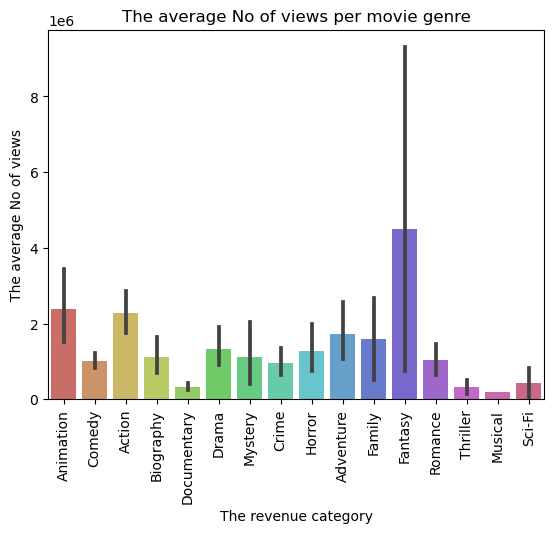

In [64]:
sb.barplot(x = df["genres"] , y = df["overall_views"], palette= 'hls')
plt.title("The average No of views per movie genre")
plt.xlabel("The revenue category")
plt.xticks(rotation = 90)
plt.ylabel("The average No of views");

While Action genres generate the highest revenue, Fantasy movies, on average, garner more views than other genres

*9. No of Awards per movie genre*

<Axes: xlabel='genres'>

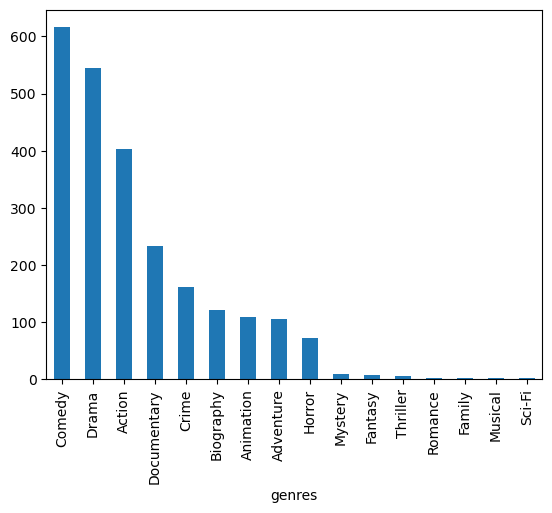

In [87]:
df.groupby("genres")["awards_win"].count().sort_values(ascending = False).plot(kind = 'bar')
plt.title("The no of awards per movie genre")
plt.xlabel("The genres of movie")
plt.ylabel("The Number of awards");

Movies like comedy, Drama , Action and Documentary are the genres with the most number of awards won.

*10. What impact do movie ratings have on the generation of revenue for a film ?*

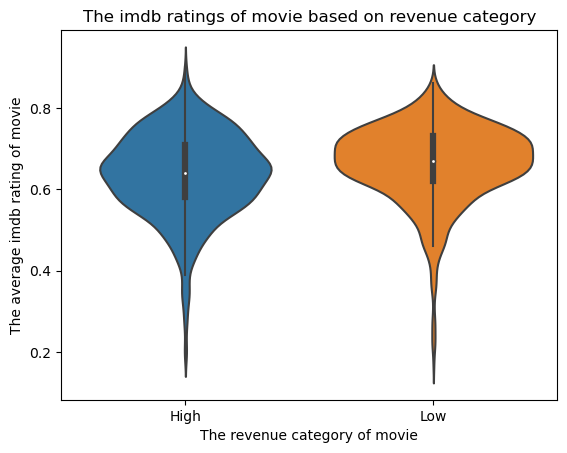

In [240]:
sb.violinplot(x = df["revenue_category"] , y= df["ratings_imdb"])
plt.xlabel("The revenue category of movie")
plt.ylabel("The average imdb rating of movie")
plt.title("The imdb ratings of movie based on revenue category");

There is no significant variance in ratings between movies that fall into high and low revenue categories. However, films with lower revenue tend to have slightly higher ratings than those in the high-revenue categories. This suggests that a movie's high ratings do not necessarily translate to high revenue.

#### Multivarate Analysis

*1. How  movie award affect rating per revenue category*

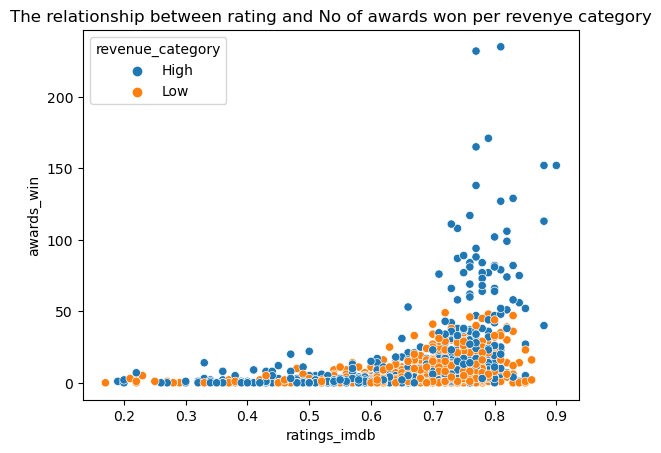

In [265]:
sb.scatterplot(x = df["ratings_imdb"] , y = df["awards_win"] , hue= df["revenue_category"])
plt.title("The relationship between rating and No of awards won per revenye category");


This futher emphasizes on  the correlation between an increase in the number of awards won and higher movie ratings. However, this connection is particularly evident in films that generate greater revenue. Consequently, identifying a movie that yields the highest revenue involves considering movies with both high ratings and numerous awards

2.Average number of awards won by movie genres with title adapted from the original scenes?

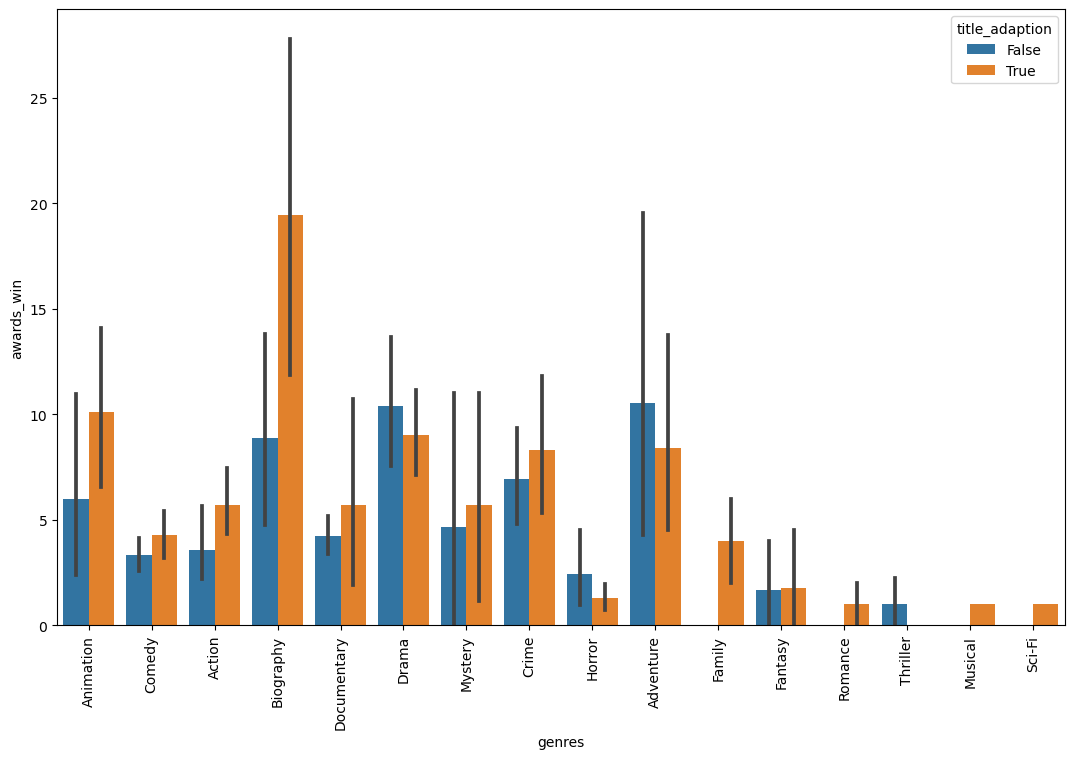

In [266]:
plt.figure(figsize=(13,8))
sb.barplot(x= df["genres"], y = df["awards_win"],hue= df["title_adaption"])
plt.xticks(rotation = 90);

The majority of movie genres with original screenplays tend to receive more recognition than others, with the notable exception of a few genres like Horror, Drama, and Adventure, where adapted movies often garner more awards than those with original screenplays.

## Splitting of the Training data set

For this project, Two datasets were provided , the training dataset and test dataset  required for submission. To ensure the performance of our model  before applying it on our test dataset, there is a need for us to evualate it on additional sample of data

As a result of this, I  will be spliting the training data set further into 2 portions namely- a training and test data set while we use the provided test set as the validation set.

Recall, some cleaning were done on the training data for insights and exploration. but in the case of splitting and preparing our data for machine learning algorithms. We would use the original training data before cleaning (we have a clone of it already)for splitting and wrapping all the cleaning and transformations in a custom transformers for the following reasons :

1. This will allow me reproduce this transformations easily on any dataset (e.g the next time I will get a fresh dataset).

2. I can use the function in live system to transform the new data before feeding it to my algorithms.

In [268]:
# df_clone.replace([np.inf, -np.inf], np.nan)

In [269]:
#Transforming the label into discrete values before splitting

df_clone["revenue_category"] = df_clone["revenue_category"].map({"High":1,"Low":0} )

label = df_clone["revenue_category"]

df_clone.drop(("revenue_category"), inplace = True, axis =1 )

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train , X_test, Y_train, Y_test = train_test_split(df_clone, label , random_state= True , test_size= .2 ,shuffle= True )

### Data Preprocessing

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin


In [277]:
cols_drop = ['title','country','genres','language','censor_rating',"release_date","dvd_release_date"]
class Column_Transformers(BaseEstimator , TransformerMixin):
    
    def __init__(self,new_columns = True):
        
        """instatiating new columns , the columns are turned on by default ,we can turn it off later to see if new colums
        have any effect on the performance of the mode"""
        
        self.new_columns = new_columns 
        
    def fit(self , X, y = None):
        
        return self
    
    def transform(self,X,y = None):
        X_ = X.copy()
        
        "Now we wrap the cleaning in the function "
        
        X_["ratings_imdb"] = X_["ratings_imdb"].apply(lambda x :float(x.split("/")[0])/10)
        X_["ratings_metacritic"] = X_["ratings_metacritic"].apply(lambda x :float(x.split("/")[0])/100)
        X_["ratings_tomatoes"] = X_["ratings_tomatoes"].apply(lambda x :float(x.replace("%",""))/100)
        X_["users_votes"] = X_["users_votes"] .apply(lambda x :int(x.replace(",","")))
        X_["runtime"] = X_["runtime"].apply(lambda x : int(x.replace("min"," ")))
        X_["title_adaption"] = ( X_["title_adaption"]==True).astype(int)# converting categorical column to numerical values
        
        # performing feature engineering by adding new collumns to the data,assigning weights to the three ratings and merging it into 1 
        X_["likes_per_view"] = X_['overall_views']/X_['likes']
        X_["dislikes_per_view"] = X_['overall_views']/X_['dislikes']
        X_["Final_rating"] = X_["ratings_imdb"] *4 + X_["ratings_tomatoes"] *3 + X_["ratings_metacritic"]*3
        
        
        
        if self.new_columns :
        
            
            return X_.drop(cols_drop, axis =1).replace([np.inf, -np.inf], np.nan) #
        else : # turning off the default new columns
             X_.drop(cols_drop + ["likes_per_view","dislikes_per_view","Final_rating"] , axis =1).replace([np.inf, -np.inf], np.nan) #
            

In [278]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Model Fitting and Evaluation 

In [279]:
Model_pipeline  = Pipeline([
    ('feature_selction', Column_Transformers()),('missing_values',SimpleImputer(strategy='mean')),
    ('Scaler',StandardScaler()),("clf", KNeighborsClassifier())])

In [281]:
Model_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('feature_selction', Column_Transformers()),
                ('missing_values', SimpleImputer()),
                ('Scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [282]:
Knn_predict = Model_pipeline.predict(X_test)

In [283]:
print(classification_report(Knn_predict, Y_test))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       219
           1       0.80      0.70      0.75       261

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



The F1 score seems not too bad , but lets see  how another model perform. In doing that ,lets compare the performance of all  models and look at  that performs better

Using a for loop to compare performance of the model

In [284]:
Knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
Svm_clf = SVC()
Naive_bayes_clf = GaussianNB()
Decision_tree = DecisionTreeClassifier()

models ={"KNeigbors":Knn_clf,
    "Random Forest classifier": rf_clf,
    "Support Vector":Svm_clf,
         "Naive Bayes clf" : Naive_bayes_clf,
         "Decision_tree" : Decision_tree}


# build final pipeline
for name, model in models.items():
    
    Model_Pipeline = Pipeline([
    ('feature_selction', Column_Transformers()),('missing_values',SimpleImputer(strategy='mean')),
    ('Scaler',StandardScaler()),
        ("Model", model)
    ])
    # model fitting
    Model_Pipeline.fit(X_train, Y_train)
    
    # model scoring
    test_pred = Model_Pipeline.predict(X_test)
#     valid_pred = complete_pipeline.predict(X_valid)
    
    # Evaluate model performance
    print(" the classification report for ", name, "is ","\n")
    print(classification_report(test_pred , Y_test))
    
   

 the classification report for  KNeigbors is  

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       219
           1       0.80      0.70      0.75       261

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480

 the classification report for  Random Forest classifier is  

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       234
           1       0.87      0.81      0.84       246

    accuracy                           0.84       480
   macro avg       0.85      0.84      0.84       480
weighted avg       0.85      0.84      0.84       480

 the classification report for  Support Vector is  

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       239
           1       0.83      0.79      0.81       241

    accuracy      

Here, it is evident that the Random Forest classifier outperforms all other models.

#### Reasons for using the Model evaluation metrics outsides from accuracy score ?

Here , we use two metrics to evaluate the performance of the model, the accuracy and F1 score(the harmonic mean between precision and recall). The reasons for using these metrics is outlined below


1. Accuracy: Accuracy is used to evaluate the proportion of correct predictions relative to the total predictions. In the case of the Random Forest classifier, the model achieved a success rate of 86%, making accurate predictions 86% of the time and incorrect predictions only 14% of the time. However, accuracy may not provide a comprehensive perspective, especially in the context of an unbalanced dataset. Since our training data is not highly balanced, alternative metrics like the F1 score are more suitable for a True picture .


2. Precision - We are mostly concerned about how many correct predictions it made for the positive class alone, in this case the no of movies it predicted correctly for high revenue category.

    This is important in machine learning , if for example we only want our model to focus on recognizing movies that will      generate high revenue alone. Then our metric would focus only on precision. for Random forest classifier , it has a        precision score of 86% which means that when it classifies movie that will generate high revenues then it was correct      86% of the time.
   
  
3. Recall- Recall focuses on the model's ability to correctly identify true positives, indicating how well it recognizes relevant instances. For our best model, the Random Forest classifier achieved a recall of 89%, signifying that it accurately identified high revenue-generating movies 89% of the time..

4. F1 score - The F1 score serves as a balanced measure between precision and recall. It is important for assessing how well precision and recall harmonize. If either score is lower, the harmonic mean score will be affected accordingly.

ROC curve is also another metrics that can be used to visualize the peformance of our model.


Note: The model's performance can be enhanced by fine-tuning hyperparameters or exploring more powerful models, such as neural network models. This involves experimenting with different epochs, nodes, and refining the overall model performance.

Now lets use the chosel model and use it to predict the test data that was provided(which I called the validation set earlier)

In [285]:
Rclf_model = Pipeline([
    ('feature_selction', Column_Transformers()),('missing_values',SimpleImputer(strategy='mean')),
    ('Scaler',StandardScaler()),
        ("Model", RandomForestClassifier())
    ])

In [286]:
Rclf_model.fit(X_train , Y_train)

Pipeline(steps=[('feature_selction', Column_Transformers()),
                ('missing_values', SimpleImputer()),
                ('Scaler', StandardScaler()),
                ('Model', RandomForestClassifier())])

In [287]:
predicted_label = Rclf_model.predict(test_data)

In [288]:
#add and transforming the label back to categorical values.
test_data['Revenue_category']  = predicted_label
test_data["Revenue_category"] = test_data["Revenue_category"].map({1:"High",0:"low"}) 
test_data = test_data[["title", "Revenue_category"]]
test_data.to_csv("test_data_submission.csv")